# Lab 8: Define and Solve an ML Problem of Your Choosing

In [128]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [129]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

 # YOUR CODE HERE
df = pd.read_csv(adultDataSet_filename, header=0)

df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Adult census dataset
2. We will be predicting the individual's highest educational status. Our label will be the "education" column.
3. This is a supervised learning classification problem. Since there are multiple educational levels, it is a multi-class classification problem.
4. Workclass, age, education-num, occupation, hours-per-week, native-country, income-binary.
5. Banks when chosing who to give loans/credit cards to may want to look at the individual's education. Additionally, educational companies such as Kahn Academy may want to see their audience's education statuses to produce specifically catered products for their level. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [131]:
# YOUR CODE HERE

#Find missing values
null_vals = np.sum(df.isnull(), axis=0)
missing_cond = null_vals != 0 
missing_cols = list(null_vals[missing_cond].index)
df[missing_cols].dtypes

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

In [132]:
#Replace float type features

nan_detected = df.isnull().any()

is_numeric = (df.dtypes == 'float64')

nan_num_features = df.columns[nan_detected & is_numeric].tolist()

for col in nan_num_features:
    mean_val = df[col].mean()
    df.fillna({col: mean_val}, inplace=True)
    print(f"Imputed {col} with mean value: {mean_val:.2f}")


#Replace object type features 

is_categorical = (df.dtypes == 'object')
nan_categorical_features = df.columns[nan_detected & is_categorical].tolist()

for col in nan_categorical_features:
    if col != 'education': 
        df.fillna({col: 'Missing'}, inplace=True) 
        print(f"Filled categorical {col} with 'Missing'")


#Check for missing again 
np.sum(df.isnull(), axis=0)

Imputed age with mean value: 38.59
Imputed hours-per-week with mean value: 40.45
Filled categorical workclass with 'Missing'
Filled categorical occupation with 'Missing'
Filled categorical native-country with 'Missing'


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

In [133]:
#Create binary variables
df['workclass'].unique() 

not_self_employed = ~(df['workclass'] == 'Self-emp-inc') & ~(df['workclass'] == 'Self-emp-not-inc') 
condition = not_self_employed & ~(df['workclass'] == 'unknown')
df['workclass'] = np.where(condition, 'Not-self-emp', df['workclass'])

df['marital-status'].unique()

not_married = ~(df['marital-status'] == 'Married-civ-spouse') & ~(df['marital-status'] == 'Married-spouse-absent') & ~(df['marital-status'] == 'Married-AF-spouse') 
df['marital-status'] = np.where(not_married, 'Not-married', df['marital-status'])


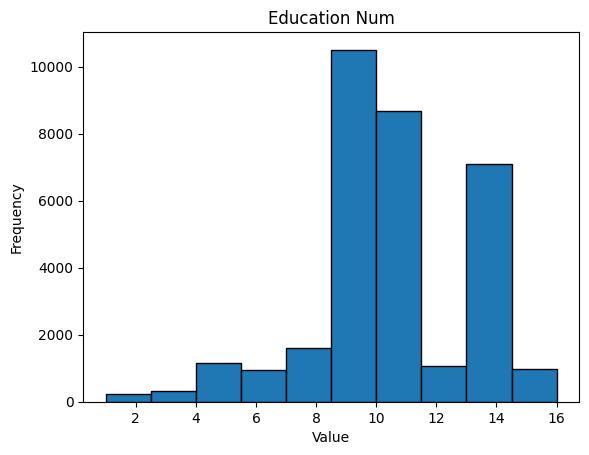

In [134]:
#Find and fix outliers
zscores = df.select_dtypes(include=['number']).apply(stats.zscore)
zscores.head(20)

plt.hist(df['education-num'], bins=10, edgecolor='black') 
plt.title('Education Num')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [135]:
# Winsorize 
df['education-num-winz'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df.drop(columns='education-num', inplace=True)
df.head(15)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,education-num-winz
0,39.0,Not-self-emp,77516,Bachelors,Not-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Not-self-emp,215646,HS-grad,Not-married,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Not-self-emp,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Not-self-emp,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13
5,37.0,Not-self-emp,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,14
6,49.0,Not-self-emp,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K,5
7,52.0,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K,9
8,31.0,Not-self-emp,45781,Masters,Not-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K,14
9,42.0,Not-self-emp,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K,13


In [136]:
categorical_features = df.columns[(df.dtypes == 'object') & (df.columns != 'education')].tolist()
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

workclass: 3 unique values
marital-status: 4 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex_selfID: 2 unique values
native-country: 42 unique values
income_binary: 2 unique values


In [137]:
country_counts = df['native-country'].value_counts()
rare_countries = country_counts[country_counts < 100].index
df['native-country'] = df['native-country'].replace(rare_countries, 'Other')
df['native-country'].unique()

array(['United-States', 'Other', 'India', 'Missing', 'Mexico',
       'Puerto-Rico', 'Canada', 'Germany', 'Philippines', 'El-Salvador'],
      dtype=object)

In [138]:
# one hot encoding other categorical features
to_encode = categorical_features

# Create the encoder object
enc = OneHotEncoder(sparse_output=False)

# Apply the encoder to your categorical columns
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))

# Get the feature names and assign them as column names
df_enc.columns = enc.get_feature_names_out(input_features=to_encode)

# Remove the original categorical columns from your dataframe
df.drop(columns=to_encode, inplace=True)

# Join the one-hot encoded features back to your main dataframe
df = df.join(df_enc)

# Verify the results
df.head()
df.columns

Index(['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education-num-winz', 'workclass_Not-self-emp',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Not-married',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Missing',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relation

In [139]:
#Bin Education Categories 
df['education'].unique()

def bin_education_binary(edu):
    # College degree = 'Higher Education' or 'Some College'
    if edu in ['Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college']:
        return 'College Degree'
    # No college degree = Everything else
    else:
        return 'No College Degree'

df['education_binary'] = df['education'].apply(bin_education_binary)

df['education_binary'].unique()

array(['College Degree', 'No College Degree'], dtype=object)

In [140]:
#Scaling 

numerical_cols = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].tolist()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

We first searched for all columns with missing values, and either replaced them with a mean value or a 'missing' category using the fillna() function. Then we picked out two columns to change into binary variables using numpy where() function (workclass and marital status). Lastly, we searched for outliers by finding the zscore of feature values and an analysis of the feature data on a histogram. We removed the 'education-num' or now 'education-num-wins' column since it correlated with the label and led to an immediate 100% accuracy score for out model. For the model, we started with the logistic regression algorithm, used grid search with 5 fold cross validation to find the best C value, and analyzed with an ROC curve. Similarly, we trained a Random Forest model with grid search to optimize the hyperparameters. We plotted the best features based on their importance, selected the best features, and trained a new model using those favorable features. During this process, we tested multiple algorithms like gradient boosted decision trees and simple decision trees, but found they did not compare as well as our random forest model. We also started off with multiclass classification, but soon ran into a problem of low accuracy and high class imbalance, so switched to binary classification of where we can have only two labels('college degree' and 'no college degree') and get better results to achieve the same goal of determining education level of individuals. When we switched to a binary classification problem, we were able to experiment with logistic regression more and obtain higher accuracy scores.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [141]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [142]:
# YOUR CODE HERE
le = LabelEncoder()
X = df.drop(columns = ['education', 'education_binary','education-num-winz'])
y = le.fit_transform(df['education_binary'])  # Converts to binary 0, 1

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [144]:
print(pd.Series(y_train).value_counts())

0    12509
1    10283
dtype: int64


In [145]:
class_counts = df['education_binary'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.1f}")

Imbalance Ratio: 1.2


In [146]:
#Logistic regression with grid search 

# Create a LogisticRegression model 
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Parameter grid
cs = [10**i for i in range(-5,5)]
param_grid = {'C' : cs}

#Run a grid search with 5-fold cross-validation
grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, scoring='accuracy')

#Fit the model on the training data and assign the fitted model to variable 'grid_search'
grid_search = grid.fit(X_train, y_train)


best_C = grid_search.best_params_['C']
print(best_C) 

1


In [147]:
#Train LR model based on best hyperparameters 

best_lr = LogisticRegression(C = best_C, max_iter = 1000, class_weight='balanced')
best_lr.fit(X_train, y_train)

proba_predictions_lr = best_lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,proba_predictions_lr)

0.7771514873039029


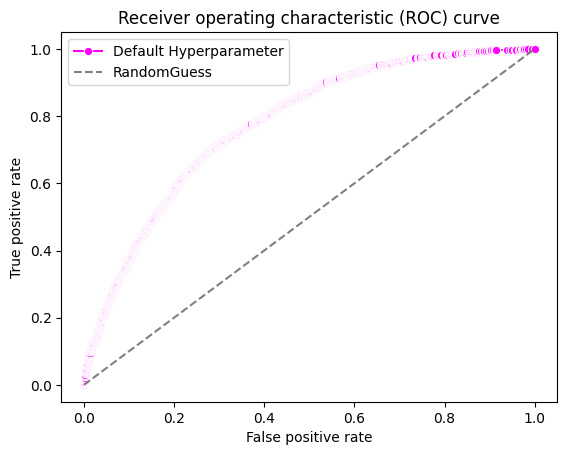

In [148]:
#plotting roc curve
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_lr, y=tpr_lr, marker='o', color='magenta',
label='Default Hyperparameter', ax=ax)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='RandomGuess') # Diagonal line
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

auc_lr = auc( fpr_lr, tpr_lr )
print(auc_lr)

In [149]:
# Random Forest with Grid Search

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = { 'n_estimators': [50, 100], 
              'max_depth': [10, 20]}

grid_search_rf= GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [150]:
best_n_estimators = grid_search_rf.best_params_['n_estimators']
best_max_depth = grid_search_rf.best_params_['max_depth']

print(best_n_estimators)
print(best_max_depth)

100
20


In [151]:
#Train new best model 
best_rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_split = 5, min_samples_leaf = 3, random_state = 123)

best_rf.fit(X_train, y_train)

proba_predictions_rf = best_rf.predict_proba(X_test) [:,1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,proba_predictions_rf)

0.7959332568874924


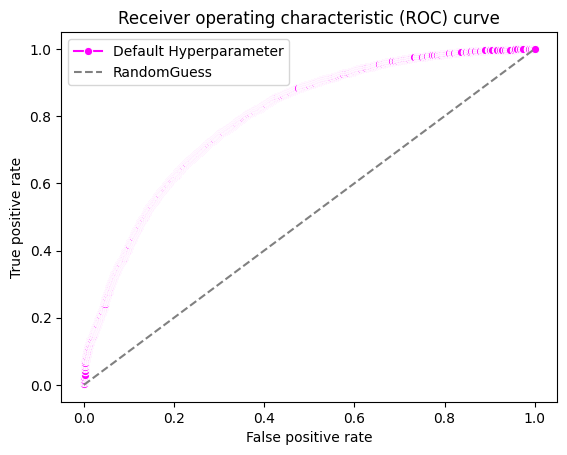

In [152]:
#plotting roc curve
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_rf, y=tpr_rf, marker='o', color='magenta',
label='Default Hyperparameter', ax=ax)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='RandomGuess') # Diagonal line
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
auc_rf = auc( fpr_rf, tpr_rf )
print(auc_rf)

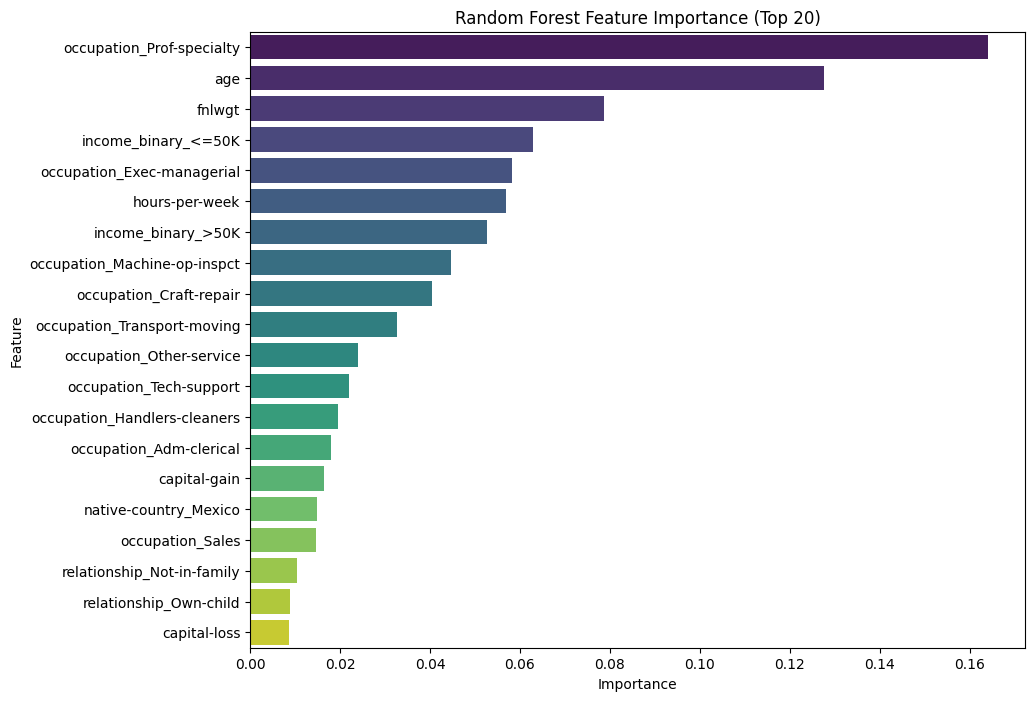

In [153]:
# Feature Importance
# Feature Importance
rf_importance = best_rf.feature_importances_
features_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_rf.head(20),palette='viridis')
plt.title('Random Forest Feature Importance (Top 20)')
plt.show()

In [156]:
# Select the best features and train new model 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k= 53)
selector.fit(X, y)
filter = selector.get_support()
top_features = X.columns[filter]
print("Best * features:")
print(top_features)

# Create new training and test data for features
new_X_train = X_train[top_features]
new_X_test = X_test[top_features]

# Initialize a LogisticRegression model object 
model_newrf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_split = 5, min_samples_leaf = 3, random_state = 123)
#model_newrf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_split = 2, random_state=42, class_weight='balanced')

# Fit the model to the new training data
model_newrf.fit(new_X_train, y_train)

# Use the predict_proba() method to use your model to make predictions on the new test data
proba_predictions_new = model_newrf.predict_proba(new_X_test)[:,1]

# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions_new)
auc_result = auc(fpr, tpr)
print(auc_result)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=53 is greater than n_features=52. All the features will be returned.
  warnings.warn(


Best * features:
Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Not-self-emp', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Not-married',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Missing',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
      

In [158]:
import pickle

In [159]:
with open("best_education.pkl", "wb") as f:
 pickle.dump(model_newrf, f)

In [160]:
#model back from the file
with open("best_education.pkl", "rb") as f:
 loaded_model = pickle.load(f)
# Use the loaded model to make predictions on X_test
predictions = loaded_model.predict(X_test)
# print(predictions[:20])

# mapping predictions
mapping = {0: 'No College Degree', 1: 'College Degree'}
edu_predictions = [mapping[p] for p in predictions]
print(edu_predictions[:20])


['No College Degree', 'No College Degree', 'No College Degree', 'College Degree', 'College Degree', 'No College Degree', 'No College Degree', 'No College Degree', 'College Degree', 'College Degree', 'No College Degree', 'College Degree', 'No College Degree', 'No College Degree', 'College Degree', 'No College Degree', 'No College Degree', 'No College Degree', 'No College Degree', 'No College Degree']
